### **Read CSV File**

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [67]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-26 15:39:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2022-01-26 15:39:16 (151 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [138]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### **Preprocessing the Data**

In [139]:
X= df[['Principal','terms','age','education','Gender']].values
X[:5]

array([[1000, 30, 45, 'High School or Below', 'male'],
       [1000, 30, 33, 'Bechalor', 'female'],
       [1000, 15, 27, 'college', 'male'],
       [1000, 30, 28, 'college', 'female'],
       [1000, 30, 29, 'college', 'male']], dtype=object)

In [140]:
le_education=preprocessing.LabelEncoder()
le_education.fit(["High School or Below","college","Bechalor","Master or Above"])
X[:,3]=le_education.transform(X[:,3])

le_gender=preprocessing.LabelEncoder()
le_gender.fit(["male","female"])
X[:,4]=le_gender.transform(X[:,4])
X[0:5]

array([[1000, 30, 45, 1, 1],
       [1000, 30, 33, 0, 0],
       [1000, 15, 27, 3, 1],
       [1000, 30, 28, 3, 0],
       [1000, 30, 29, 3, 1]], dtype=object)

In [141]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.65,  0.42],
       [ 0.52,  0.92,  0.34, -1.52, -2.38],
       [ 0.52, -0.96, -0.65,  1.1 ,  0.42],
       [ 0.52,  0.92, -0.49,  1.1 , -2.38],
       [ 0.52,  0.92, -0.32,  1.1 ,  0.42]])

In [142]:
y= df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test_set:',X_test.shape, y_test.shape)

Train set: (276, 5) (276,)
Test_set: (70, 5) (70,)


### **K nearest neighborhood classification**

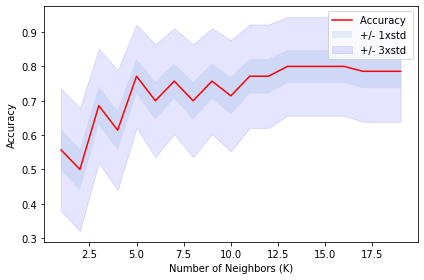

The best accuracy was with 0.8 with k= 13


In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

ks=20
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1,ks) :
  neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
  yhat=neigh.predict(X_test)
  mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


plt.plot(range(1,ks),mean_acc,'red')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.fill_between(range(1,ks),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha=0.10,color='blue')
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 



In [172]:
neigh=KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)
KNN_yhat=neigh.predict(X_test)
KNN_yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### **Decission Tree**

In [147]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [158]:
predTree= loanTree.predict(X_test)
predTree

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

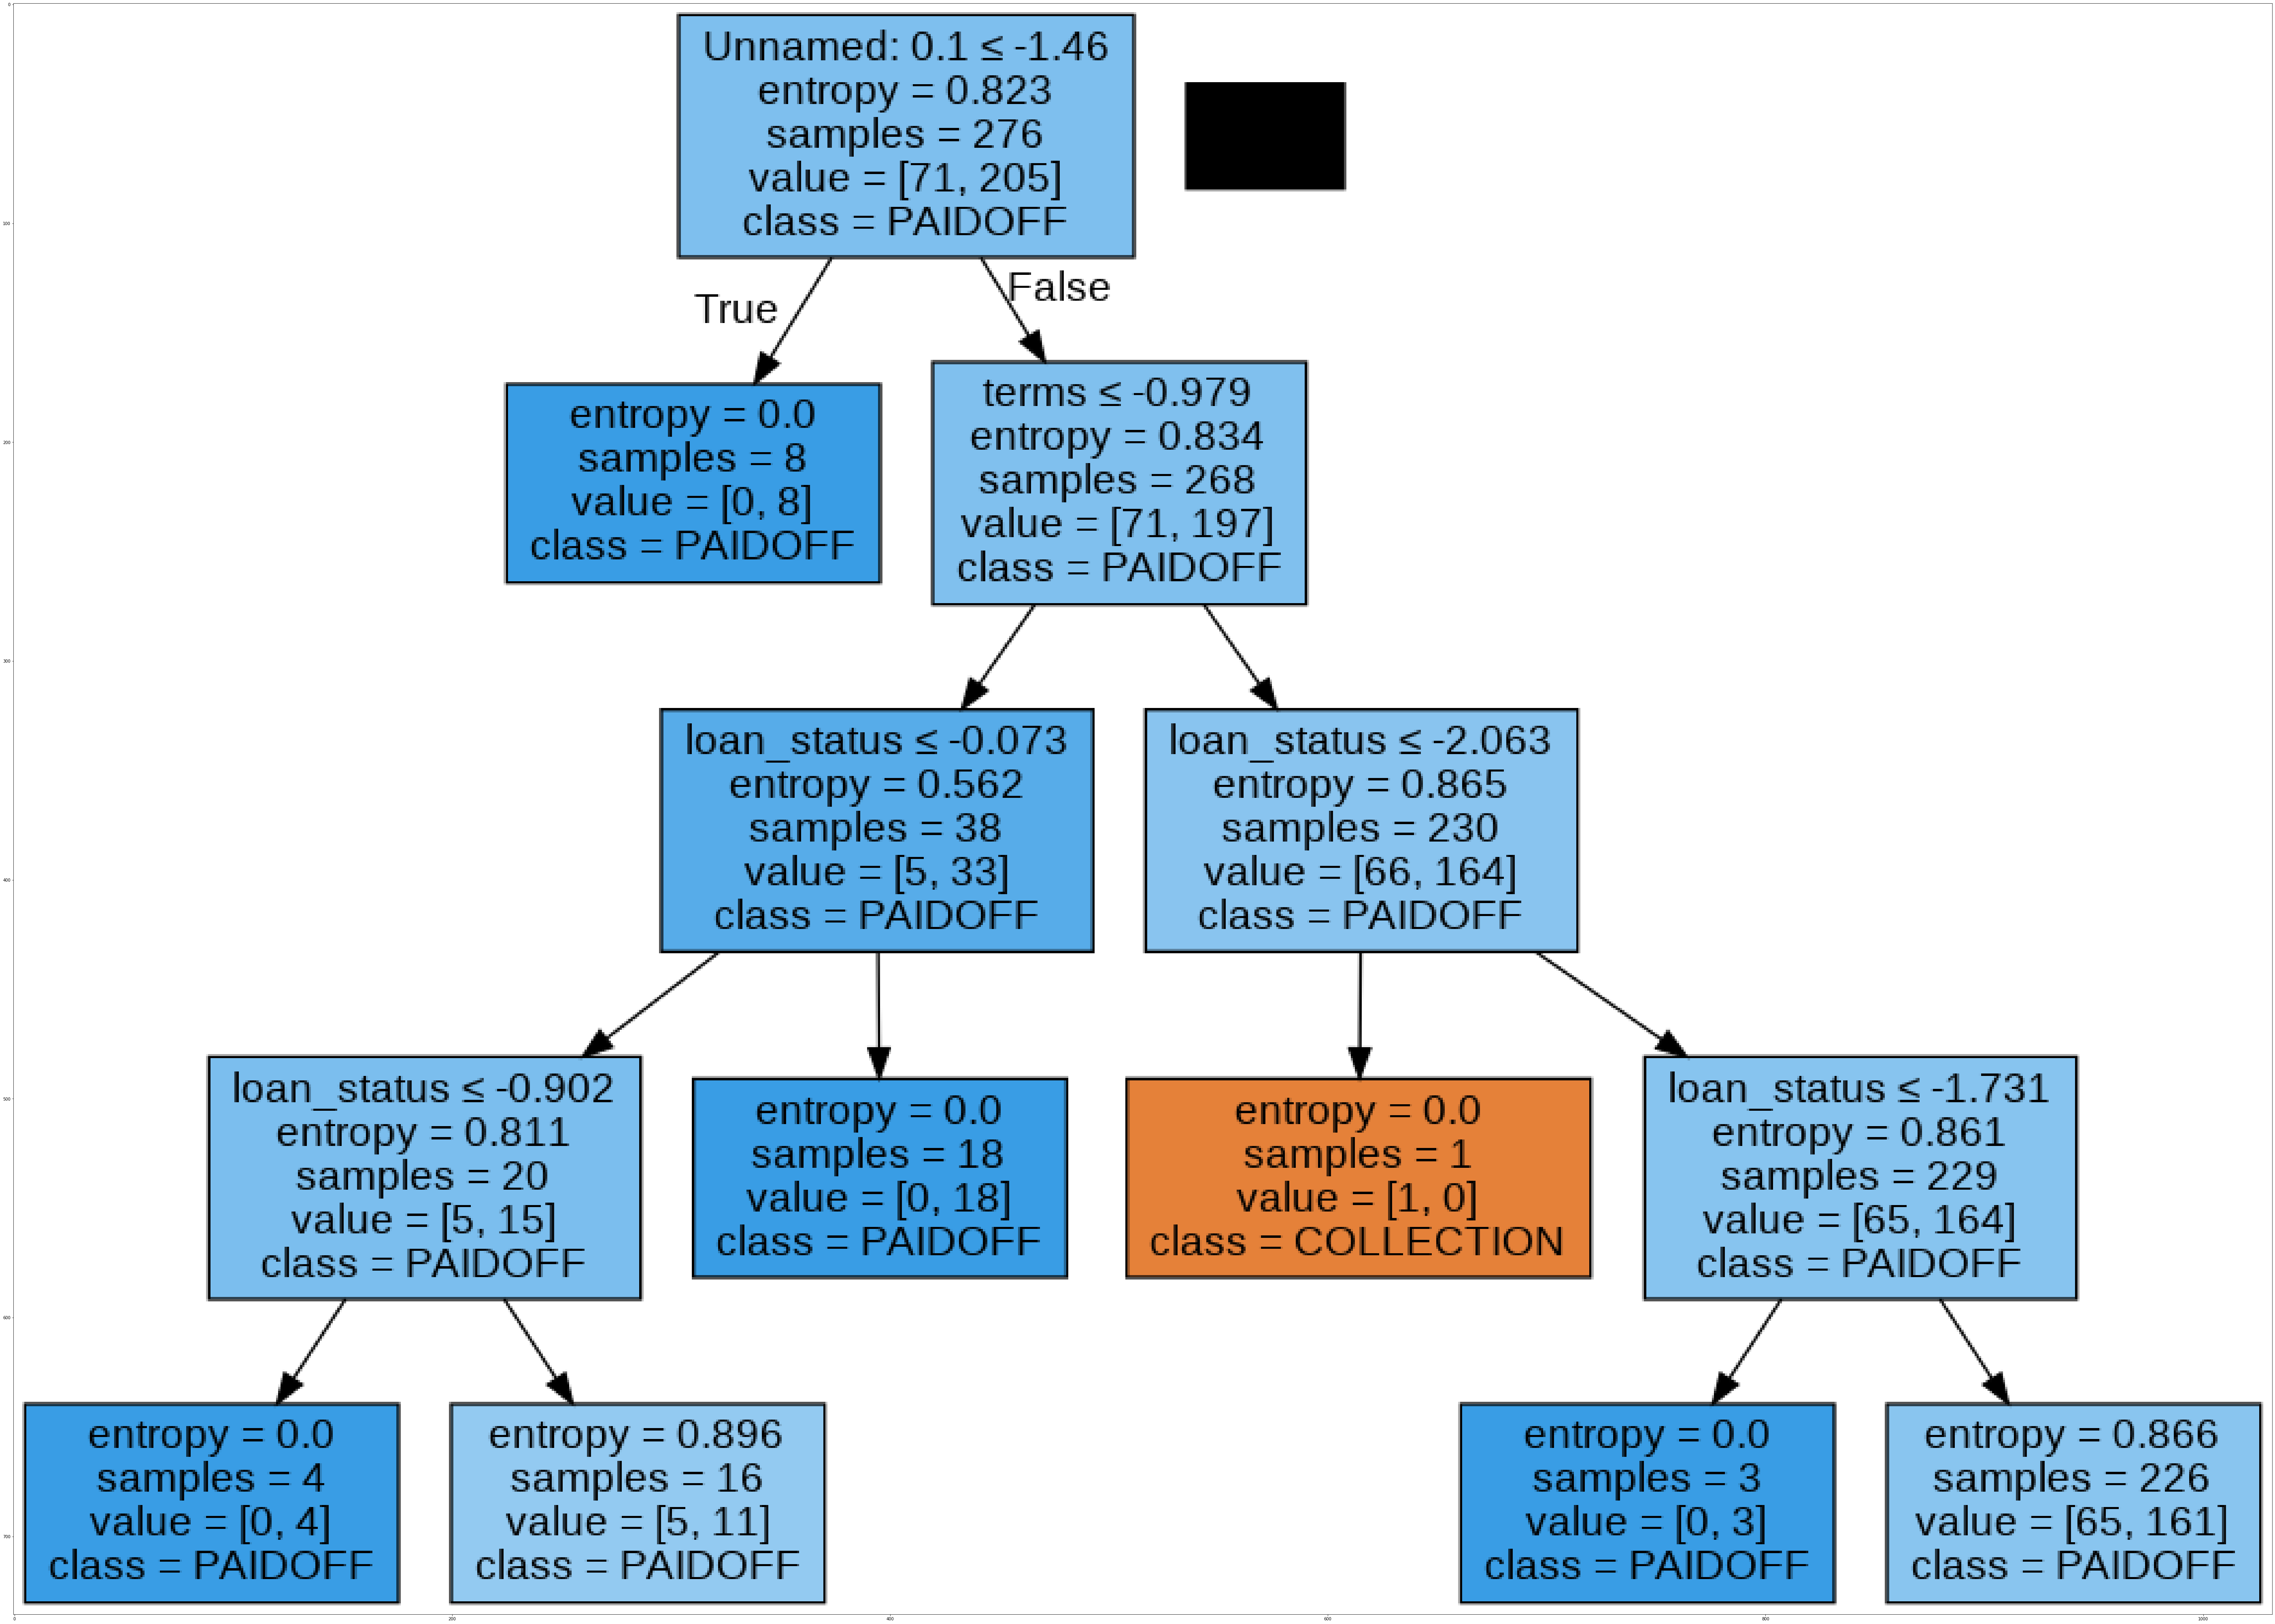

In [149]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data=StringIO()
filename= "loanTree.png"
featuresNames= df.columns[0:5]
out= tree.export_graphviz(loanTree,feature_names=featuresNames,out_file=dot_data, class_names=np.unique(y_train),filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')

### **SVM Classification**

In [119]:
import pylab as plt
import scipy.optimize as opt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Preprocessing

In [164]:
clf =SVC(kernel='rbf')
clf.fit(X_train,y_train)
SVM_yhat=clf.predict(X_test)
SVM_yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [165]:
clf2=SVC(kernel='linear')
clf2.fit(X_train,y_train)
SVM_yhat2=clf2.predict(X_test)
SVM_yhat2

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [166]:
clf3=SVC(kernel='sigmoid')
clf3.fit(X_train,y_train)
SVM_yhat3=clf3.predict(X_test)
SVM_yhat3

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [167]:
clf4=SVC(kernel='poly')
clf4.fit(X_train,y_train)
SVM_yhat4=clf4.predict(X_test)
SVM_yhat4

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

### **Logistic Regression**

In [162]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_yhat=LR.predict(X_test)
LR_yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [163]:
LR_yhat_prob=LR.predict_proba(X_test)
LR_yhat_prob

array([[0.43, 0.57],
       [0.38, 0.62],
       [0.4 , 0.6 ],
       [0.45, 0.55],
       [0.42, 0.58],
       [0.41, 0.59],
       [0.42, 0.58],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.43, 0.57],
       [0.44, 0.56],
       [0.43, 0.57],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.36, 0.64],
       [0.34, 0.66],
       [0.45, 0.55],
       [0.4 , 0.6 ],
       [0.44, 0.56],
       [0.42, 0.58],
       [0.37, 0.63],
       [0.43, 0.57],
       [0.44, 0.56],
       [0.39, 0.61],
       [0.33, 0.67],
       [0.44, 0.56],
       [0.44, 0.56],
       [0.29, 0.71],
       [0.44, 0.56],
       [0.33, 0.67],
       [0.4 , 0.6 ],
       [0.39, 0.61],
       [0.39, 0.61],
       [0.42, 0.58],
       [0.32, 0.68],
       [0.39, 0.61],
       [0.44, 0.56],
       [0.38, 0.62],
       [0.38, 0.62],
       [0.4 , 0.6 ],
       [0.44, 0.56],
       [0.42, 0.58],
       [0.38, 0.62],
       [0.44, 0.56],
       [0.4 , 0.6 ],
       [0.44, 0.56],
       [0.4 , 0.6 ],
       [0.43,

### **Classification Algorithm Evaluation**

In [192]:
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

report={
    "Algorithm" : ["KNN","Decision Tree","SVM Kernel RBF","SVM Kernel Linear","SVM Kernel Sigmoid","SVM Kernel Polynomial","Logistic Regression"],
    "F1 Score" :["%.2f" % f1_score(y_test, KNN_yhat, average='weighted'),
                 "%.2f" % f1_score(y_test,predTree,average='weighted'),
                 "%.2f" % f1_score(y_test,SVM_yhat,average='weighted'),
                 "%.2f" % f1_score(y_test,SVM_yhat2,average='weighted'),
                 "%.2f" % f1_score(y_test,SVM_yhat3,average='weighted'),
                 "%.2f" % f1_score(y_test,SVM_yhat4,average='weighted'),
                 "%.2f" % f1_score(y_test,LR_yhat,average='weighted')],
    "Jaccord Index" : ["%.2f" % jaccard_score(y_test,KNN_yhat, pos_label="PAIDOFF"),
                       "%.2f" % jaccard_score(y_test,predTree, pos_label="PAIDOFF"),
                       "%.2f" % jaccard_score(y_test,SVM_yhat,pos_label="PAIDOFF"),
                       "%.2f" % jaccard_score(y_test,SVM_yhat2,pos_label="PAIDOFF"),
                       "%.2f" % jaccard_score(y_test,SVM_yhat3,pos_label="PAIDOFF"),
                       "%.2f" % jaccard_score(y_test,SVM_yhat4,pos_label="PAIDOFF"),
                       "%.2f" % jaccard_score(y_test,LR_yhat,pos_label="PAIDOFF")],
    "Log loss" : ["N/A","N/A","N/A","N/A","N/A","N/A", "%.2f" % log_loss(y_test,LR_yhat_prob)]
}

dataFrame=pd.DataFrame(report)
dataFrame

,Algorithm,F1 Score,Jaccord Index,Log loss
0,KNN,0.72,0.80,N/A
1,Decision Tree,0.69,0.79,N/A
2,SVM Kernel RBF,0.69,0.79,N/A
3,SVM Kernel Linear,0.69,0.79,N/A
4,SVM Kernel Sigmoid,0.67,0.74,N/A
5,SVM Kernel Polynomial,0.69,0.79,N/A
6,Logistic Regression,0.69,0.79,0.60


From Report file above we can know what is the best algorithm to predict the loan status that is KNN classification algorithm with K=13